# Poisson Distribution for Number of Storms
Hurricanes are often used as the example of a poisson process in stat's 101 courses. Here we'll look at distribution for the shape parameter $\lambda$, the number of storms per year, and update it according to the storm data provided in the "PUT NAME HERE" data set for named storms from 2000 to 2010.

In order to do this we'll make use of Baeysian analysis. For this we'll need to compute the following:

$$ P(\lambda | \text{Data} ) = \frac{P( \text{Data} | \lambda) P(\lambda)}{P( \text{Data} )}. $$

Here, our prior is given by $P(\lambda)$ and our likelyhood by $P(\text{Data} | \lambda)$.

## Prior
Chirs, our resident storm master, has decided that 12 named storms per years sounds reasonable. I agree, since Chris is an expert after all, and we will use that as part of our prior. Therefore, since the conjugate prior to the poisson distribution is the gamma distribution, we'll use a gamma distribution centered around 12.

In [1]:
import numpy
import pandas
from scipy.special import gamma
from scipy.stats import poisson, nbinom
from matplotlib import pyplot
%matplotlib inline

In [2]:
def gamma_dist(x, alpha, beta):
    return beta**alpha * x**(alpha - 1) * numpy.exp(-beta*x)/gamma(alpha)

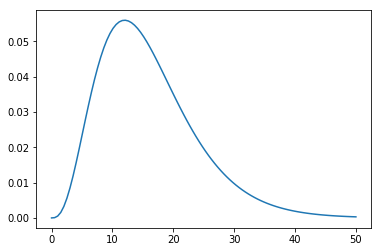

In [3]:
alpha = 4
beta = 0.25
x = numpy.linspace(0,50,100)
g = gamma_dist(x, alpha, beta)
pyplot.plot(x,g)

## Likelyhood
With our prior distribution spared away, we now move onto the likelyhood. Here, it is the likelyhood of seeing $k$ many storms in $n$ many $\lambda$s. As mentioned before, this is typically modeled by a poisson distribution, which is given by

$$ P(k| \lambda) = \frac{\lambda^k e^{-\lambda}}{k!} $$

## Computing the Posterior
Armed with our prior and likelyhood, we're now taked with computing the posterior. However, it turns out the the gamma distribution is the [conjugate prior](https://en.m.wikipedia.org/wiki/Conjugate_prior). Thus we know that the posterior distribution is given by the negative binomial distribution 
$$ NB(k | \alpha^\prime, \theta^\prime) = {k + \alpha^\prime - 1 \choose k} (1-\theta^\prime)^{\alpha^\prime} p ^ k $$

where $\alpha^\prime$ and $\theta$ are given by
$$ \alpha^\prime = \alpha + x$$
$$ \theta = \frac{1}{1 + \beta + n}. $$

Above, $x$ is the number of storms that occur in $n$ years.

## Finding the Number of Named Storms
We finally need to load the data and look at the number of storms that occur.

In [15]:
# load data and name columns
hurricane_raw = pandas.read_csv("hurricane.csv", header=None)
hurricane_raw.columns = [
                        'year', 'month', 'day', 
                        'hour', 'storm_year_id',
                        'name', 'latitude', 'longitude',
                        'wind_speed', 'pressure'
                        ]

In [16]:
# select only named storms
has_name = hurricane_raw.name != "NOT_NAMED"
named = hurricane_raw[has_name]

In [17]:
# create a unique identifier and count the number of names and the number of years
n_storms = len((named['name'] + named['year'].map(str)).unique())
n_years = 10

We're now ready to update our parameters

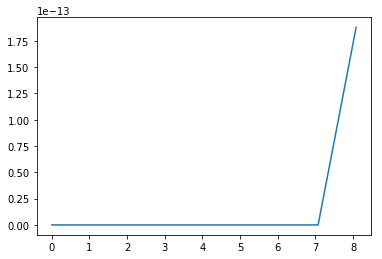

In [43]:
alpha_p = alpha + n_storms
beta_p= beta + n_years

x = numpy.linspace(0,100,100)
nb = gamma_dist(x, alpha_p, beta_p)

pyplot.plot(x, nb)